Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN
import pickle

In [2]:
df = pd.read_csv("tel_churn.csv")
print("✅ Dataset Loaded Successfully.")
print(df.shape)
df.head()

✅ Dataset Loaded Successfully.
(7032, 52)


,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,1,0,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,2,0,53.85,108.15,1,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,3,0,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,4,0,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


In [3]:
df = df.drop("Unnamed: 0", axis=1)
print("✅ Dropped Unnecessary Columns.")

✅ Dropped Unnecessary Columns.


In [4]:
X = df.drop("Churn", axis=1)
y = df["Churn"]


In [5]:

print("Feature Columns:", X.shape[1])
print("Target Distribution:\n", y.value_counts())

Feature Columns: 50
Target Distribution:
 Churn
0    5163
1    1869
Name: count, dtype: int64


train test split

/var/folders/_6/wfkf4g6j0cbfb39_ltl7h51m0000gn/T/ipykernel_32174/2551112673.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="coolwarm")


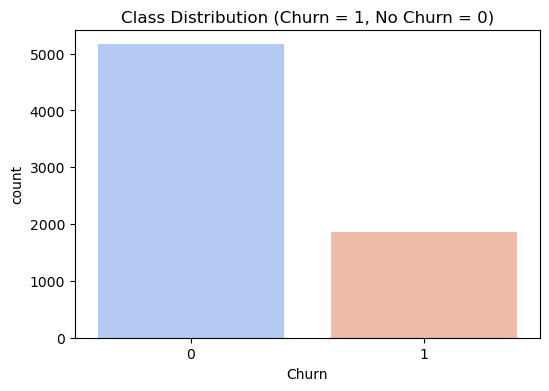

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="coolwarm")
plt.title("Class Distribution (Churn = 1, No Churn = 0)")
plt.show()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train/Test Split Done ✅")

Train/Test Split Done ✅


Decision Tree Classifier 

In [8]:
model_dt = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [9]:

y_pred_dt = model_dt.predict(x_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("\n🔹 Decision Tree Accuracy:", round(acc_dt, 3))
print(classification_report(y_test, y_pred_dt))


🔹 Decision Tree Accuracy: 0.767
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.56      0.59      0.57       374

    accuracy                           0.77      1407
   macro avg       0.70      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



In [10]:
X_resampled, y_resampled = sm.fit_resample(X, y)

xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model_dt_smote = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(xr_train, yr_train)

yr_predict_dt = model_dt_smote.predict(xr_test)
acc_dt_smote = accuracy_score(yr_test, yr_predict_dt)
print("\n🔹 Decision Tree (SMOTEENN) Accuracy:", round(acc_dt_smote, 3))
print(classification_report(yr_test, yr_predict_dt))

NameError: name 'sm' is not defined

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini',
                                  random_state=100, max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train, y_train)

y_pred_rf = model_rf.predict(x_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("\n🔹 Random Forest Accuracy:", round(acc_rf, 3))
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Accuracy: 0.781
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1033
           1       0.63      0.42      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X, y)

xr_train1, xr_test1, yr_train1, yr_test1 = train_test_split(X_resampled1, y_resampled1, test_size=0.2, random_state=42)

model_rf_smote = RandomForestClassifier(n_estimators=100, criterion='gini',
                                        random_state=100, max_depth=6, min_samples_leaf=8)
model_rf_smote.fit(xr_train1, yr_train1)

yr_predict1 = model_rf_smote.predict(xr_test1)
acc_rf_smote = accuracy_score(yr_test1, yr_predict1)
print("\n🔹 Random Forest (SMOTEENN) Accuracy:", round(acc_rf_smote, 3))
print(classification_report(yr_test1, yr_predict1))


🔹 Random Forest (SMOTEENN) Accuracy: 0.938
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       548
           1       0.92      0.97      0.94       617

    accuracy                           0.94      1165
   macro avg       0.94      0.94      0.94      1165
weighted avg       0.94      0.94      0.94      1165



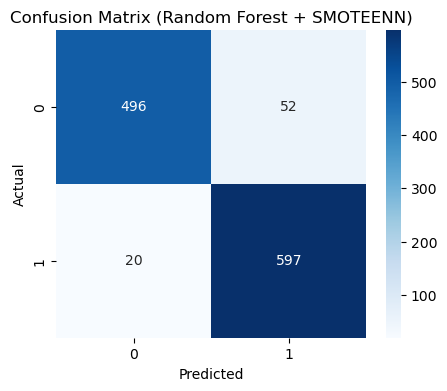

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(yr_test1, yr_predict1), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix (Random Forest + SMOTEENN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)

model_pca = RandomForestClassifier(n_estimators=100, criterion='gini',
                                   random_state=100, max_depth=6, min_samples_leaf=8)
model_pca.fit(xr_train_pca, yr_train1)

yr_predict_pca = model_pca.predict(xr_test_pca)
acc_pca = accuracy_score(yr_test1, yr_predict_pca)
print("\n🔹 Random Forest (PCA) Accuracy:", round(acc_pca, 3))
print(classification_report(yr_test1, yr_predict_pca))


🔹 Random Forest (PCA) Accuracy: 0.708
              precision    recall  f1-score   support

           0       0.71      0.64      0.67       548
           1       0.71      0.77      0.74       617

    accuracy                           0.71      1165
   macro avg       0.71      0.70      0.70      1165
weighted avg       0.71      0.71      0.71      1165



In [ ]:
import pickle
X = pd.get_dummies(df.drop('Churn', axis=1), drop_first=True)
y = df['Churn']

model.fit(X, y)

pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(X.columns.tolist(), open('model_columns.pkl', 'wb'))




In [ ]:
sample = xr_test1.iloc[0:1]
print("\n📘 Sample Input:\n", sample)
pred = model_rf_smote.predict(sample)
print("\n🔮 Predicted Churn:", "Yes" if pred[0] == 1 else "No")


📘 Sample Input:
       SeniorCitizen  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
4293              0       76.758056    332.010179           True         True   

      Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
4293        True         True           True           False            False   

      ...  PaymentMethod_Bank transfer (automatic)  \
4293  ...                                    False   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
4293                                  False                            True   

      PaymentMethod_Mailed check  tenure_group_1 - 12  tenure_group_13 - 24  \
4293                       False                 True                 False   

      tenure_group_25 - 36  tenure_group_37 - 48  tenure_group_49 - 60  \
4293                 False                 False                 False   

      tenure_group_61 - 72  
4293                 False  

[1 rows x 50 columns]

/var/folders/_6/wfkf4g6j0cbfb39_ltl7h51m0000gn/T/ipykernel_6835/3987212134.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette="viridis")


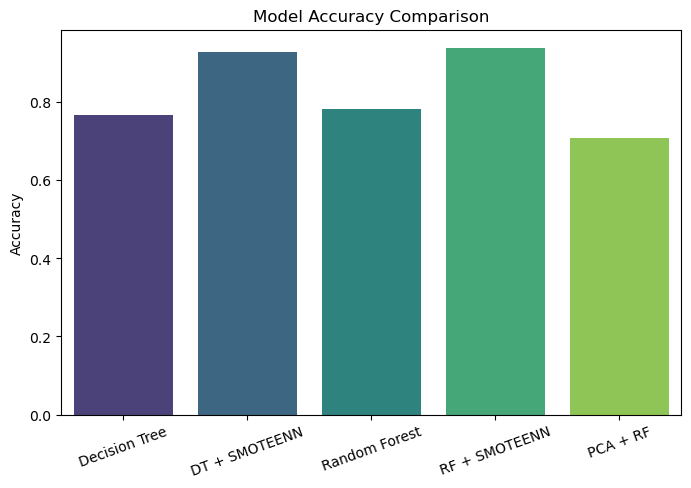

In [ ]:
models = ["Decision Tree", "DT + SMOTEENN", "Random Forest", "RF + SMOTEENN", "PCA + RF"]
scores = [acc_dt, acc_dt_smote, acc_rf, acc_rf_smote, acc_pca]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=scores, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.show()
